In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, ttest_rel
import scipy.stats as stats


In [2]:
dataset = pd.read_csv("PrePlacement.csv")


In [3]:
print(dataset.isnull().sum())


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [4]:
dataset.drop('sl_no', inplace=True, axis=1)


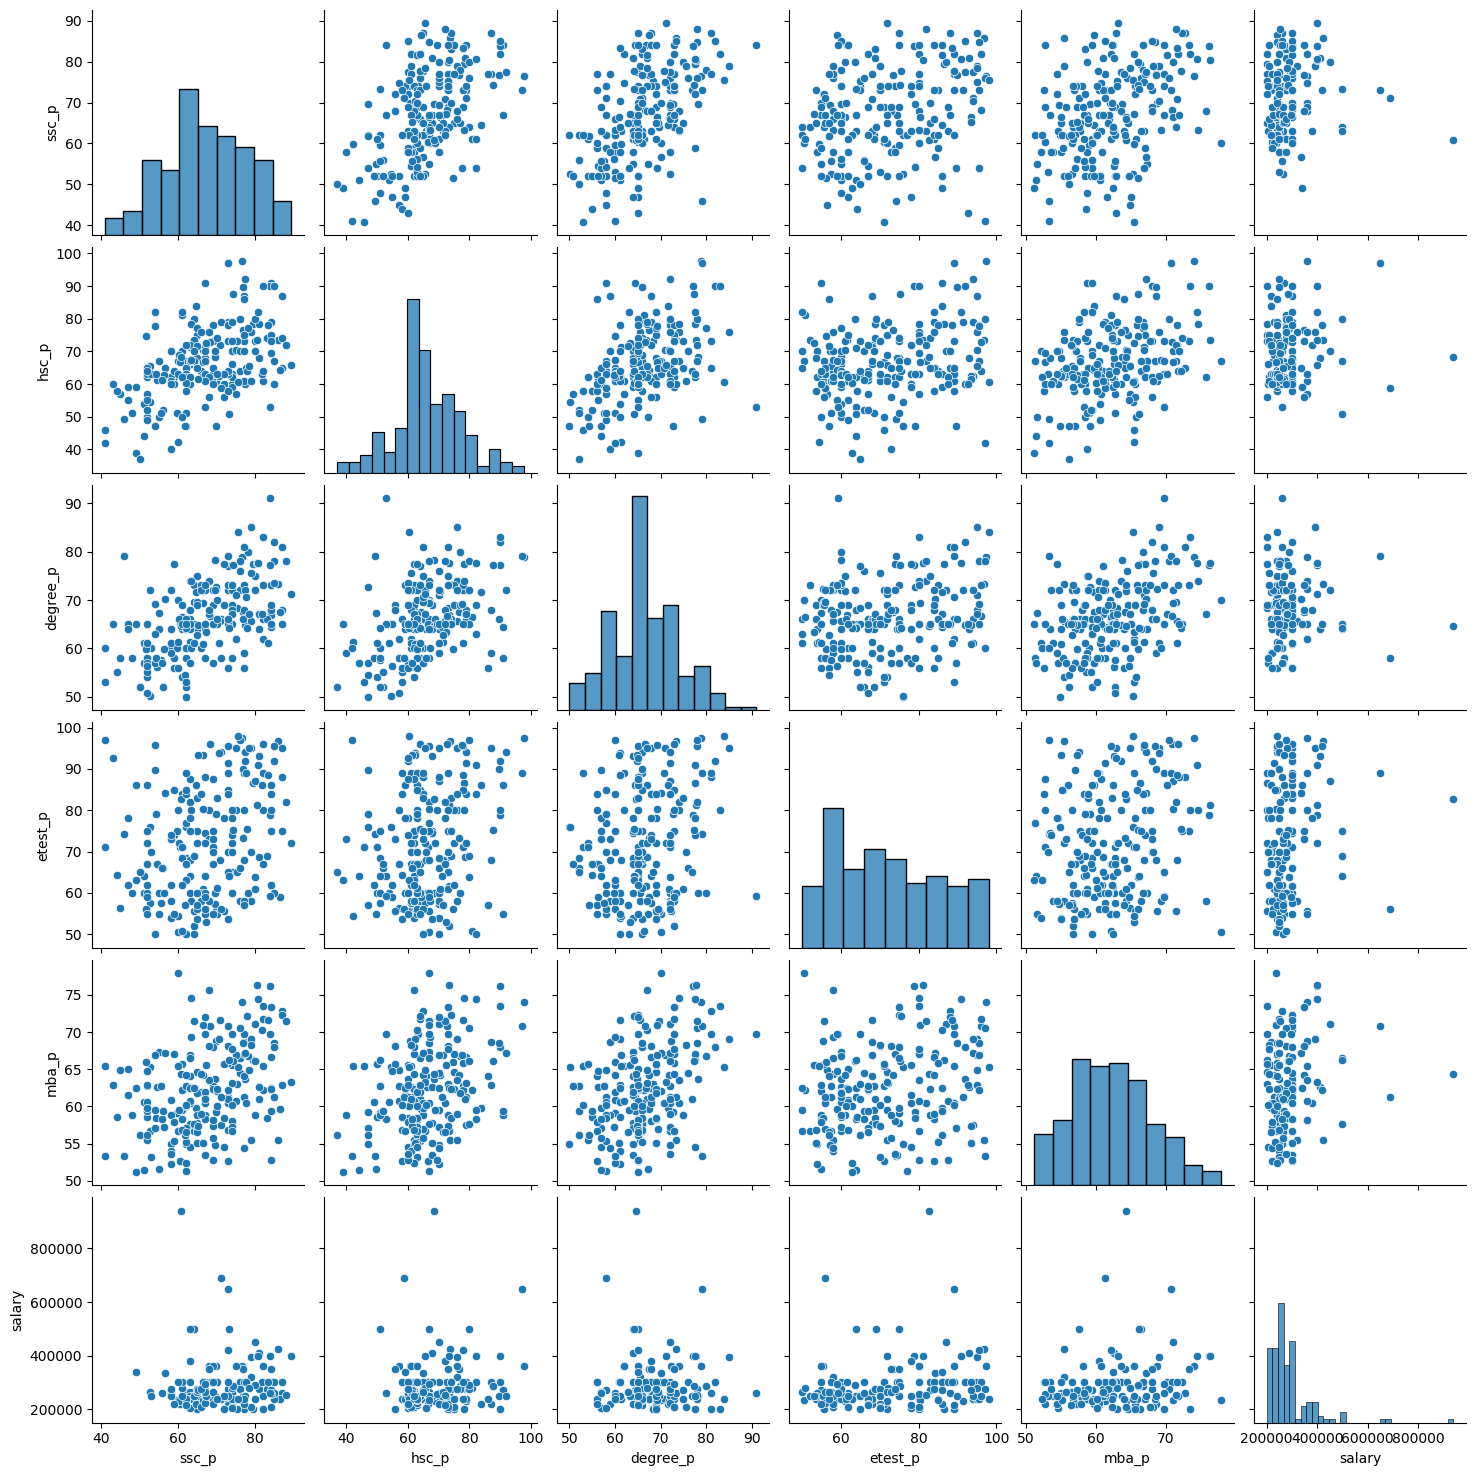

In [5]:
sns.pairplot(dataset)


In [6]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [7]:
dataset = dataset.dropna(subset=['salary'])

In [8]:
print(calc_vif(dataset[["etest_p", "salary"]]))


  variables       VIF
0   etest_p  9.440124
1    salary  9.440124


In [9]:
male = dataset[dataset['gender'] == 'M']['salary']
female = dataset[dataset['gender'] == 'F']['salary']
print("Independent T-Test:", ttest_ind(male, female))


Independent T-Test: Ttest_indResult(statistic=1.9448521615505496, pvalue=0.053714668806405776)


In [10]:
male_ssc_p = dataset[dataset['gender'] == 'M']['ssc_p']
male_hsc_p = dataset[dataset['gender'] == 'M']['hsc_p']
print("Paired T-Test:", ttest_rel(male_ssc_p, male_hsc_p))


Paired T-Test: Ttest_relResult(statistic=0.881726473207718, pvalue=0.38006050142386005)


In [11]:
print("Paired T-Test (Hypothesis):", ttest_rel(male_ssc_p, male_hsc_p))

Paired T-Test (Hypothesis): Ttest_relResult(statistic=0.881726473207718, pvalue=0.38006050142386005)


In [12]:
print("ANOVA:", stats.f_oneway(dataset['ssc_p'], dataset['hsc_p'], dataset['degree_p']))

ANOVA: F_onewayResult(statistic=4.866998084927855, pvalue=0.008114829524764158)
